# Homework 7: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository. 

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?). 

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data. 

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

In [54]:
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(psych)
library(reshape2)
library(dplyr)

setwd("~/Documents/GitHub/Luetkehans_DSPN_S22/data")

lexdata <- read.csv("LexicalData_withIncorrect.csv")
items <- read.csv("Items.csv")

head(lexdata)
head(items)


,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>
1,1,157,1,1,710,browse,false,-0.437,1
2,2,67,1,1,"1,094",refrigerant,false,0.825,1
3,3,120,1,1,587,gaining,false,-0.645,1
4,4,21,1,1,984,cheerless,false,0.025,1
5,5,236,1,1,577,pattered,false,-0.763,1
6,6,236,2,1,715,conjures,false,-0.364,1


,Occurrences,Word,Length,Freq_HAL,Log_Freq_HAL
,<int>,<fct>,<int>,<fct>,<dbl>
1,1,synergistic,11,284,5.649
2,1,synonymous,10,951,6.858
3,1,syntactical,11,114,4.736
4,1,synthesis,9,"6,742",8.816
5,1,synthesized,11,"2,709",7.904
6,1,synthesizer,11,"1,390",7.237


In [58]:
colnames(lexdata) <- c('X', 'Sub_ID', 'Trial', 'Type', 'D_RT', 'Word', 'Outlier', 'D_Zscore', 'Correct')

newlexdata <- left_join(lexdata, items, by = 'Word')

newlexdata <- newlexdata %>%
na.omit() #drop_na() was giving me some odd issues, is it ok if I do it this way instead?

head(newlexdata)

#just checking because I had some weird issues down the road
unique(newlexdata$Correct)
sum(newlexdata$Correct == 0)

,X,Sub_ID,Trial,Type,D_RT,Word,Outlier,D_Zscore,Correct,Occurrences,Length,Freq_HAL,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,2,6,"7,016",8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,3,11,104,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,4,7,"4,039",8.304
4,4,21,1,1,984,cheerless,false,0.025,1,4,9,14,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,4,8,4,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,4,8,194,5.268


[1] 1 0

[1] 7979

---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

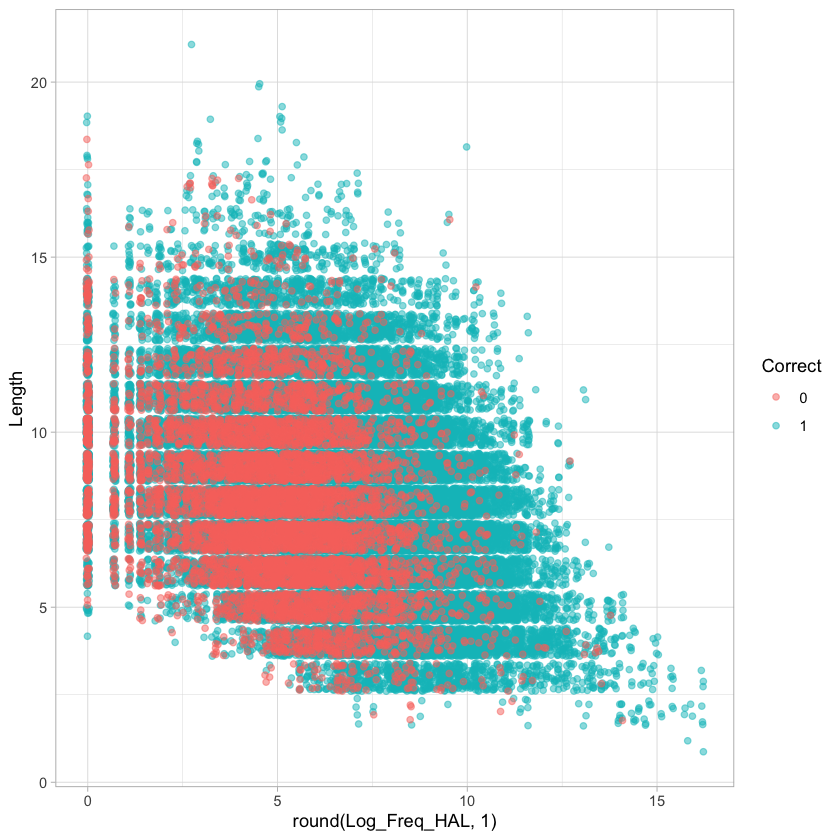

In [59]:
#vrequire(tidyverse) # Load the tidyverse package, if you haven't yet
newlexdata$Correct <- as.factor(newlexdata$Correct) # so that R knows that Correct is categorical, not numeric. 

# plot the Correct / Incorrect clusters
ggplot(newlexdata,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) + geom_point(position="jitter",alpha=0.5) + theme_light() 


What do you observe about the "Correct" and "Incorrect" clusters? 

> "Correct" and "Incorrect" responses appear to be relatively evenly distributed across words of different lengths.  Interestingly, there are very few "Incorrect" responses at the upper limits of word length.  There is also a higher density of "Correct" responses at higher log frequency values, and a higher density of "Incorrect" reponses at lower log frequency values.  Generally, though, the "Correct" cluster is larger and wider than the "Incorrect" cluster.

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [60]:
glm.fit <- glm(Correct ~ Length + Log_Freq_HAL + Length*Log_Freq_HAL, data = newlexdata, family = binomial)

summary(glm.fit)



Call:
glm(formula = Correct ~ Length + Log_Freq_HAL + Length * Log_Freq_HAL, 
    family = binomial, data = newlexdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0494   0.3178   0.4182   0.5208   1.3225  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> Am I correct to run this with the "family = binomial" option?  

> It appears that length, log_freq_hal, and their interaction can be used to predict whether a response will be correct or not.  If I'm interpreting this output correctly, increased length and frequency predict that a response is more likely to be correct (which is what I deduced from the visualization).  The interaction term having a negative coefficient means that log frequency may slightly reduce the likelihood of a correct response for different word lengths, or vice versa.  While significant, this effect is still very small as opposed to the individual effects of length or log frequency.

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [67]:
correct_predictions <- data.frame(predict(glm.fit, type = 'response'))
colnames(correct_predictions) <- c('predicted_prob')

#What I've just generated is a table with a 
#row for each trial, where the 'predicted_prob' is the probability 
#that any given observation is correct or incorrect based on the model that we just fit

#Now, assigning binary values to those predictions
threshold = 0.50
n_observations = nrow(correct_predictions)
correct_predictions$predicted_correct = rep(0, n_observations)

#Now inserting correct responses where they have been predicted
correct_predictions$predicted_correct[correct_predictions$predicted_prob > 0.5] = 1

#Now generating a confusion matrix to see how accurate our model was for predicting correct responses
confusion_df = data.frame(correct_predictions$predicted_correct, newlexdata$Correct)
colnames(confusion_df) <- c('predicted', 'actual')

confusion_matrix <- table(confusion_df)

head(correct_predictions)
confusion_matrix
n_observations

print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

,predicted_prob,predicted_correct
,<dbl>,<dbl>
1,0.9479784,1
2,0.8826628,1
3,0.9417677,1
4,0.7707288,1
5,0.6682356,1
6,0.8704362,1


         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] 70589

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not? 

>At first glance, this model appears to have done an OK job of predicting lexical decision correctness.  If we quickly calculate the accuracy of the model's predictions: 

>(13 + 62566) / 70589 = 0.887

>we can see that the model correctly precited whether a given trial would be correct or not with ~89 percent accuracy.  However, only 13 of the actual "incorrect" responses (actual n = 7979) were predicted correctly, or ~0.16%, while nearly ~99% of the "correct" responses were correctly predicted as such.

>So, our model predicted "correct" responses as such with a much greater accuracy than "incorrect" responses.  The overall accuracy rate makes this model sound really good for predicting responses, but correct responses made up an overwhelming majority of the responses, meaning that I would actually say this model predicted responses relatively poorly.

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`. 

*Hint: see the Classifiers tutorial.*

In [68]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [71]:
qda.fit = qda(Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, data = newlexdata)
qda.fit

Call:
qda(Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, data = newlexdata)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy. 

In [77]:
correct_predictions_qda <- data.frame(predict(qda.fit, type = 'response'))
colnames(correct_predictions_qda) <- c('Correct', 'prob_incorrect', 'prob_correct')
head(correct_predictions_qda)

confusion_matrix_qda <- table(correct_predictions_qda$Correct, newlexdata$Correct)
colnames(confusion_matrix_qda) <- c('predicted', 'actual')

confusion_matrix_qda

print(paste("Accuracy:",mean(correct_predictions_qda$Correct==newlexdata$Correct)))

,Correct,prob_incorrect,prob_correct
,<fct>,<dbl>,<dbl>
1,1,0.02842981,0.9715702
2,1,0.15567716,0.8443228
3,1,0.05352231,0.9464777
4,1,0.25641008,0.7435899
5,1,0.31449666,0.6855033
6,1,0.14651538,0.8534846


   
    predicted actual
  0       455   1647
  1      7524  60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

> The QDA prediction performance is, overall, slightly less accurate than the logistic regression prediction.  However, I am curious to evaluate the accuracy for each type of response as well, given how poorly the logistic regression model predicted "Incorrect" responses in particular.

> proportion "incorrect" responses correctly predicted:
    455 / 7979 = ~5.7%

> proportion "correct" responses correctly predicted:
    60963 / 62610 = ~97%
    
> so, while this model was less accurate overall, it predicted "incorrect" responses more accurately than the logistic regression model, but "correct" responses less accurately than the logistic regression model.  Overall, the logistic regression model appears to be more useful for making accurate predictions, but seeing this tradeoff in where the inaccuracies appear is interesting.

**DUE:** 5pm EST, March 25, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*